<a href="https://colab.research.google.com/github/AleR26/ColabFiles/blob/main/Tarea_20_Ejercicios_de_Normalizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio 1: Normalización Min-Max

1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, alcohol).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Min-Max a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1. ¿Cómo afectó la normalización Min-Max a la distribución de los datos?
  **La normalización Min-Max no afecto la distribución normal ya que al parecer solo cambio la escala de datos de 0-1 pero todo sigue igual**

2. ¿Qué interpretas del p-valor antes y después de la normalización?
  **Shapiro-Wilk probablemente rechace la normalidad (p-valor(0.02005) <0.05)**

In [16]:
from sklearn.datasets import load_wine
import pandas as pd

# Cargar el dataset
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

display(wine_df.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [17]:
import scipy.stats as stats
# Prueba de Shapiro-Wilk
shapiro_test = stats.shapiro(wine_df['alcohol'].sample(min(5000, len(wine_df['alcohol'])), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

Shapiro-Wilk Test: p-valor = 0.02005


In [18]:
min_al = wine_df['alcohol'].min()
max_al = wine_df['alcohol'].max()

wine_df['alcohol_normalizado'] = (wine_df['alcohol'] - min_al) / (max_al - min_al)
wine_df['alcohol_normalizado']

,alcohol_normalizado
0,0.842105
1,0.571053
2,0.560526
3,0.878947
4,0.581579
...,...
173,0.705263
174,0.623684
175,0.589474
176,0.563158


In [19]:
# Prueba de Shapiro-Wilk
shapiro_test = stats.shapiro(wine_df['alcohol_normalizado'].sample(min(5000, len(wine_df['alcohol_normalizado'])), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

Shapiro-Wilk Test: p-valor = 0.02005


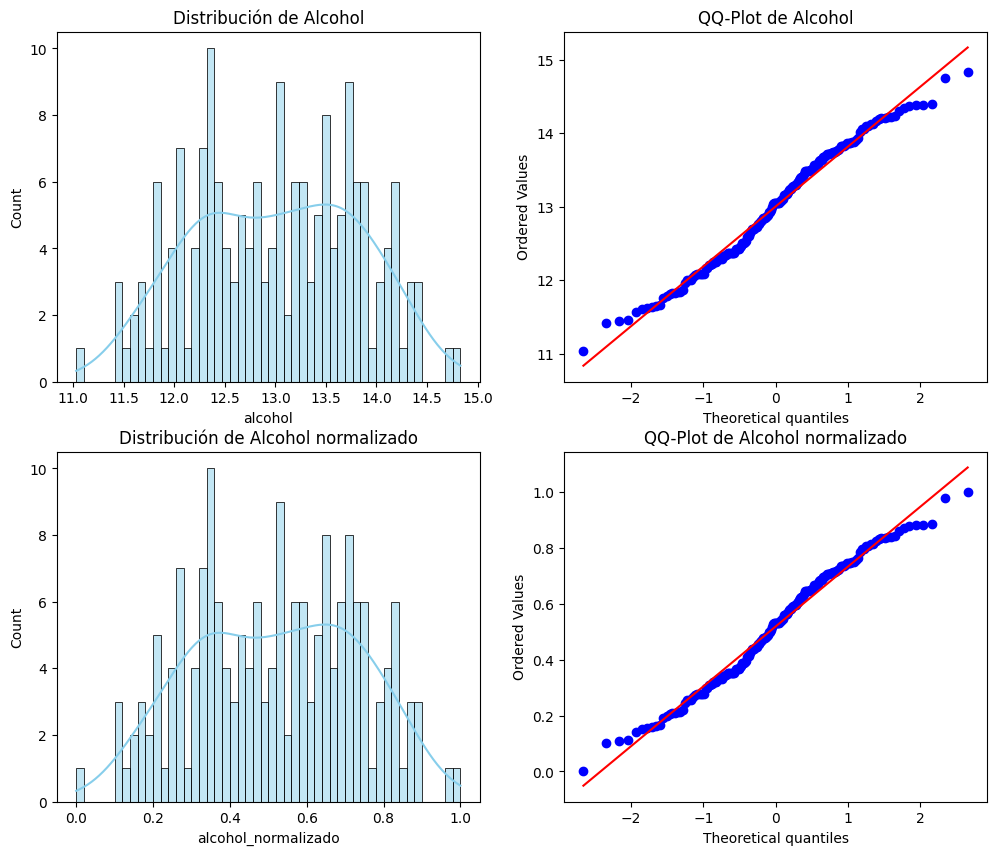

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

plt.figure(figsize=(12, 10))
# Histograma
plt.subplot(2, 2, 1)
sns.histplot(wine_df['alcohol'], bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de Alcohol")

# QQ-Plot
plt.subplot(2, 2, 2)
stats.probplot(wine_df['alcohol'], dist="norm", plot=plt)
plt.title(f"QQ-Plot de Alcohol")

# Histograma
plt.subplot(2, 2, 3)
sns.histplot(wine_df['alcohol_normalizado'], bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de Alcohol normalizado")

# QQ-Plot
plt.subplot(2, 2, 4)
stats.probplot(wine_df['alcohol_normalizado'], dist="norm", plot=plt)
plt.title(f"QQ-Plot de Alcohol normalizado")

plt.show()

# Ejercicio 2: Normalización Z-Score

Instrucciones:
1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, malic_acid).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Z-Score a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1. ¿Qué diferencia observas entre la distribución original y la normalizada con
Z-Score?
**La forma de la distribución es igual antes y despues de la normalización pero la escala es diferente**
2.	¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?
**Se convierte en una distribucion Z**



In [21]:
# Prueba de Shapiro-Wilk
shapiro_test = stats.shapiro(wine_df['malic_acid'].sample(min(5000, len(wine_df['malic_acid'])), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

Shapiro-Wilk Test: p-valor = 0.00000


In [22]:
mean_malic = np.mean(wine_df['malic_acid'])
std_malic = np.std(wine_df['malic_acid'])

wine_df['z_score'] = (wine_df['malic_acid'] - mean_malic) / std_malic
wine_df


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,alcohol_normalizado,z_score
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0.842105,-0.562250
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0.571053,-0.499413
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0.560526,0.021231
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0.878947,-0.346811
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0.581579,0.227694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,0.705263,2.974543
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,0.623684,1.412609
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,0.589474,1.744744
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,0.563158,0.227694


In [23]:
shapiro_test = stats.shapiro(wine_df['z_score'].sample(min(5000, len(wine_df['z_score'])), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

Shapiro-Wilk Test: p-valor = 0.00000


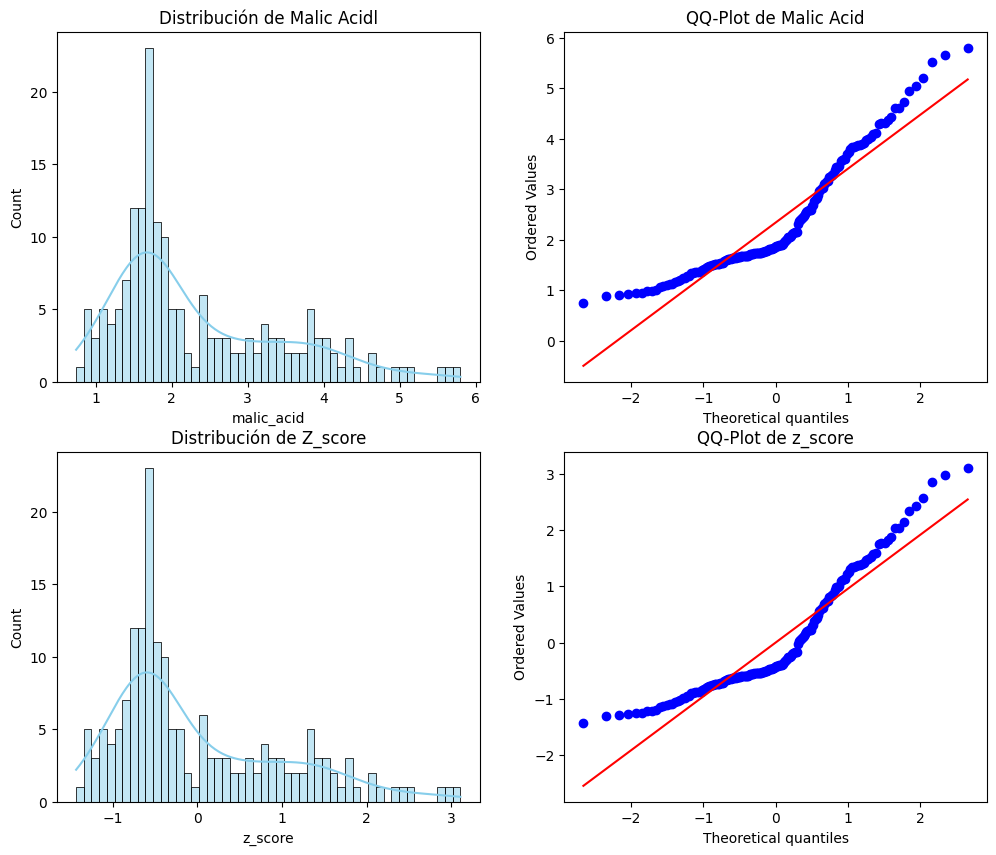

In [24]:
plt.figure(figsize=(12, 10))
# Histograma
plt.subplot(2, 2, 1)
sns.histplot(wine_df['malic_acid'], bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de Malic Acidl")

# QQ-Plot
plt.subplot(2, 2, 2)
stats.probplot(wine_df['malic_acid'], dist="norm", plot=plt)
plt.title(f"QQ-Plot de Malic Acid")

# Histograma
plt.subplot(2, 2, 3)
sns.histplot(wine_df['z_score'], bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de Z_score")

# QQ-Plot
plt.subplot(2, 2, 4)
stats.probplot(wine_df['z_score'], dist="norm", plot=plt)
plt.title(f"QQ-Plot de z_score")

plt.show()

Ejercicio 3: Transformación Logarítmica
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación logarítmica (np.log) a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1. ¿Cómo afectó la transformación logarítmica a la distribución de los datos?
**Una vez transformados los datos se muestra una distrubucion mas parecida a una curva normal**
2.	¿Qué interpretas del p-valor antes y después de la transformación logarítmica?
**Al ser <= a 0.05 se rechaza la Hipotesis nula aun despues de la transformacion logaritmica**


In [30]:
import numpy as np

# Generate random data
np.random.seed(42)
random_data = np.random.rand(100) * 100
print(random_data[:10])

[37.45401188 95.07143064 73.19939418 59.86584842 15.60186404 15.59945203
  5.80836122 86.61761458 60.11150117 70.80725778]


In [33]:
log_transformed_data = np.log(random_data)

shapiro_original = stats.shapiro(random_data)
shapiro_transformed = stats.shapiro(log_transformed_data)

print(f"Shapiro-Wilk Test (Original Data): p-valor = {shapiro_original.pvalue:.5f}")
print(f"Shapiro-Wilk Test (Log-transformed Data): p-valor = {shapiro_transformed.pvalue:.5f}")

Shapiro-Wilk Test (Original Data): p-valor = 0.00022
Shapiro-Wilk Test (Log-transformed Data): p-valor = 0.00000


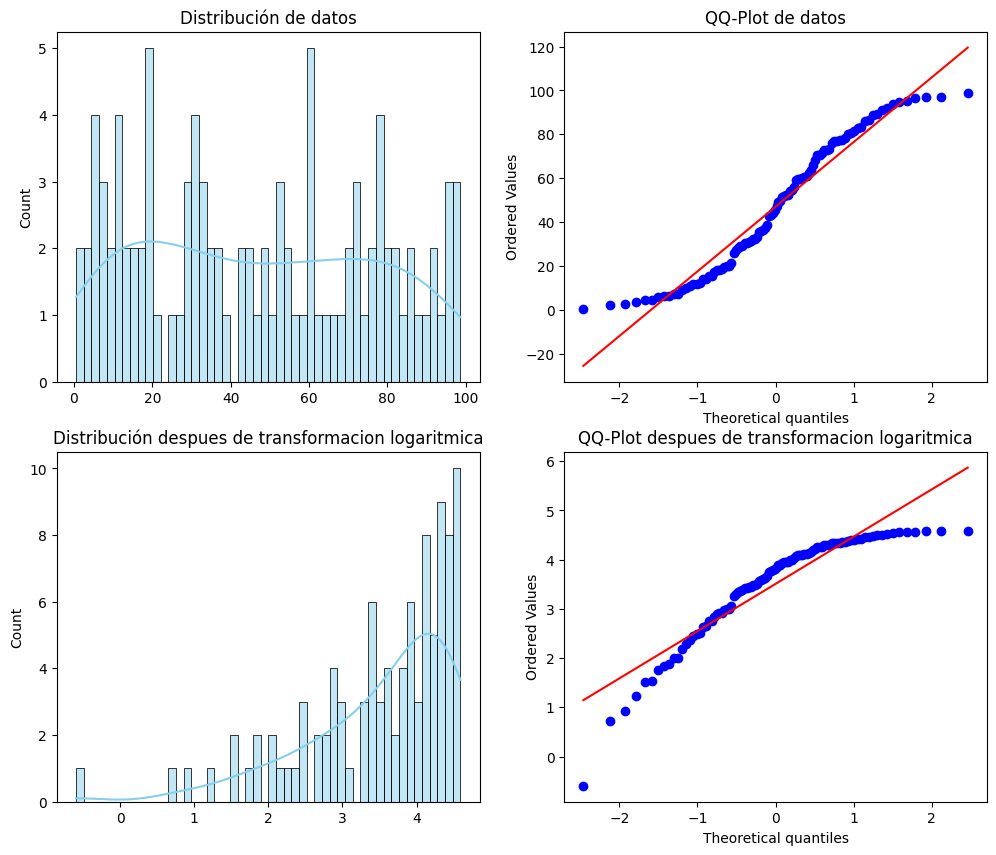

In [34]:
plt.figure(figsize=(12, 10))
# Histograma
plt.subplot(2, 2, 1)
sns.histplot(random_data, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de datos")

# QQ-Plot
plt.subplot(2, 2, 2)
stats.probplot(random_data, dist="norm", plot=plt)
plt.title(f"QQ-Plot de datos")

# Histograma
plt.subplot(2, 2, 3)
sns.histplot(log_transformed_data, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución despues de transformacion logaritmica")

# QQ-Plot
plt.subplot(2, 2, 4)
stats.probplot(log_transformed_data, dist="norm", plot=plt)
plt.title(f"QQ-Plot despues de transformacion logaritmica")

plt.show()

Ejercicio 4: Transformación Raíz Cuadrada
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación de raíz cuadrada a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1. ¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?
**Los datos cambiaron, se comprimiero de [0,100] a [0,10] modifico la distribucion pero sigue sin ser normal**
2.	¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?
**Los datos se desviaron aun mas en los extremos de los datos**


In [40]:
import numpy as np

# Generate random data
np.random.seed(42)
random_data_2 = np.random.rand(100) * 100
print(random_data[:10])

[37.45401188 95.07143064 73.19939418 59.86584842 15.60186404 15.59945203
  5.80836122 86.61761458 60.11150117 70.80725778]


In [41]:
datos_raiz = np.sqrt(random_data_2)
datos_raiz

array([6.11996829, 9.75045797, 8.55566445, 7.7373024 , 3.9499195 ,
       3.94961416, 2.41005419, 9.30685847, 7.75316072, 8.41470485,
       1.43472974, 9.84840013, 9.12382946, 4.60802681, 4.26409389,
       4.28257527, 5.51581583, 7.2440074 , 6.57225242, 5.39656502,
       7.82210262, 3.73488769, 5.40504069, 6.05278319, 6.75329537,
       8.86101553, 4.46848724, 7.17101414, 7.6968472 , 2.15523578,
       7.79451635, 4.12945667, 2.55052138, 9.74107559, 9.82665779,
       8.99109197, 5.51918263, 3.12525381, 8.27183792, 6.63439895,
       3.49339713, 7.03688077, 1.85441422, 9.53582929, 5.08704218,
       8.13954719, 5.58310913, 7.21157418, 7.39398593, 4.29947038,
       9.84674884, 8.80416278, 9.69277536, 9.45953144, 7.73239923,
       9.6014282 , 2.97476893, 4.42699517, 2.12667085, 5.70377358,
       6.23439885, 5.20911731, 9.10350212, 5.97288311, 5.30032555,
       7.36679091, 3.75398755, 8.95654499, 2.73039638, 9.93421832,
       8.78774584, 4.45775371, 0.74310949, 9.0302903 , 8.40748

In [42]:
shapiro_original = stats.shapiro(random_data_2)
shapiro_transformed = stats.shapiro(datos_raiz)

print(f"Shapiro-Wilk Test (Original Data): p-valor = {shapiro_original.pvalue:.5f}")
print(f"Shapiro-Wilk Test (Log-transformed Data): p-valor = {shapiro_transformed.pvalue:.5f}")

Shapiro-Wilk Test (Original Data): p-valor = 0.00022
Shapiro-Wilk Test (Log-transformed Data): p-valor = 0.00054


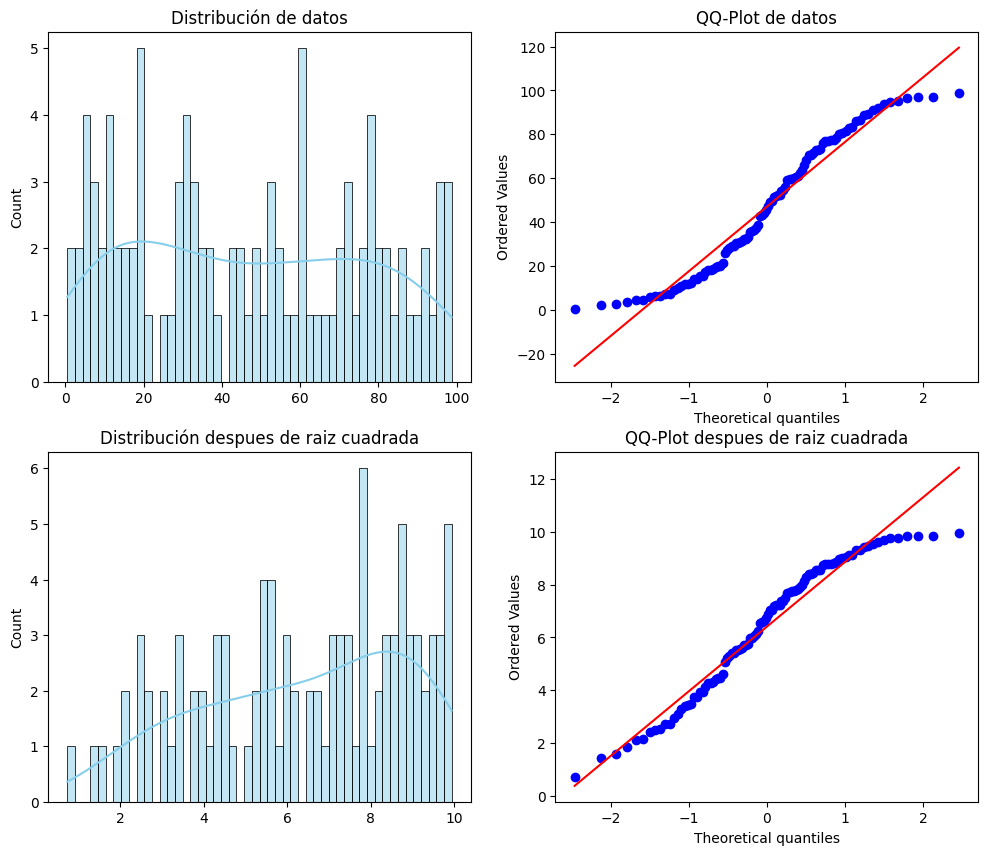

In [43]:
plt.figure(figsize=(12, 10))
# Histograma
plt.subplot(2, 2, 1)
sns.histplot(random_data_2, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de datos")

# QQ-Plot
plt.subplot(2, 2, 2)
stats.probplot(random_data_2, dist="norm", plot=plt)
plt.title(f"QQ-Plot de datos")

# Histograma
plt.subplot(2, 2, 3)
sns.histplot(datos_raiz, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución despues de raiz cuadrada")

# QQ-Plot
plt.subplot(2, 2, 4)
stats.probplot(datos_raiz, dist="norm", plot=plt)
plt.title(f"QQ-Plot despues de raiz cuadrada")

plt.show()

Ejercicio 5: Transformación Box-Cox
Instrucciones:
1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:
1. ¿Cómo afectó la transformación Box-Cox a la distribución de los datos?
**La distribución sigue siendo dispersa y no normal**
2.	¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox? **Como fue .60 quiere decir que la mejor transformacion por hacer fue la raiz cuadrada**


In [52]:
import numpy as np

# Generate random data
np.random.seed(42)
random_data_3 = np.random.rand(100) * 100
print(random_data_3[:10])

[37.45401188 95.07143064 73.19939418 59.86584842 15.60186404 15.59945203
  5.80836122 86.61761458 60.11150117 70.80725778]


In [56]:
datos_transformados, lambda_optimo = stats.boxcox(random_data_3)
print(lambda_optimo)
datos_transformados

0.605205562052054


array([13.15194028, 24.36267717, 20.55556362, 18.01094103,  7.06160026,
        7.06078493,  3.13955607, 22.93702461, 18.05973318, 20.11345958,
        0.905391  , 24.67931227, 22.35291723,  8.84848423,  7.90741598,
        7.95759068, 11.40185463, 16.50387472, 14.48632972, 11.06102319,
       18.27209412,  6.49073942, 11.08519568, 12.95545029, 15.02598397,
       21.51850225,  8.46482884, 16.28266715, 17.88656573,  2.53331867,
       18.18707299,  7.54328264,  3.47965311, 24.33238009, 24.60896445,
       21.93084404, 11.41149998,  4.91081015, 19.66696083, 14.67122839,
        5.85785085, 15.87740991,  1.83696252, 23.67115387, 10.1838225 ,
       19.25495946, 11.59487364, 16.40552699, 16.95985709,  8.00349872,
       24.67396833, 21.33867781, 24.17650876, 23.42611008, 17.99585945,
       23.88216637,  4.53025469,  8.35123087,  2.46626445, 11.94220274,
       13.48764859, 10.52848465, 22.28819691, 12.72237106, 10.78711223,
       16.87702992,  6.5411715 , 21.82120704,  3.92093173, 24.95

In [54]:
shapiro_original = stats.shapiro(random_data_3)
shapiro_transformed = stats.shapiro(datos_transformados)

print(f"Shapiro-Wilk Test (Original Data): p-valor = {shapiro_original.pvalue:.5f}")
print(f"Shapiro-Wilk Test (Box-Cox): p-valor = {shapiro_transformed.pvalue:.5f}")

Shapiro-Wilk Test (Original Data): p-valor = 0.00022
Shapiro-Wilk Test (Box-Cox): p-valor = 0.00080


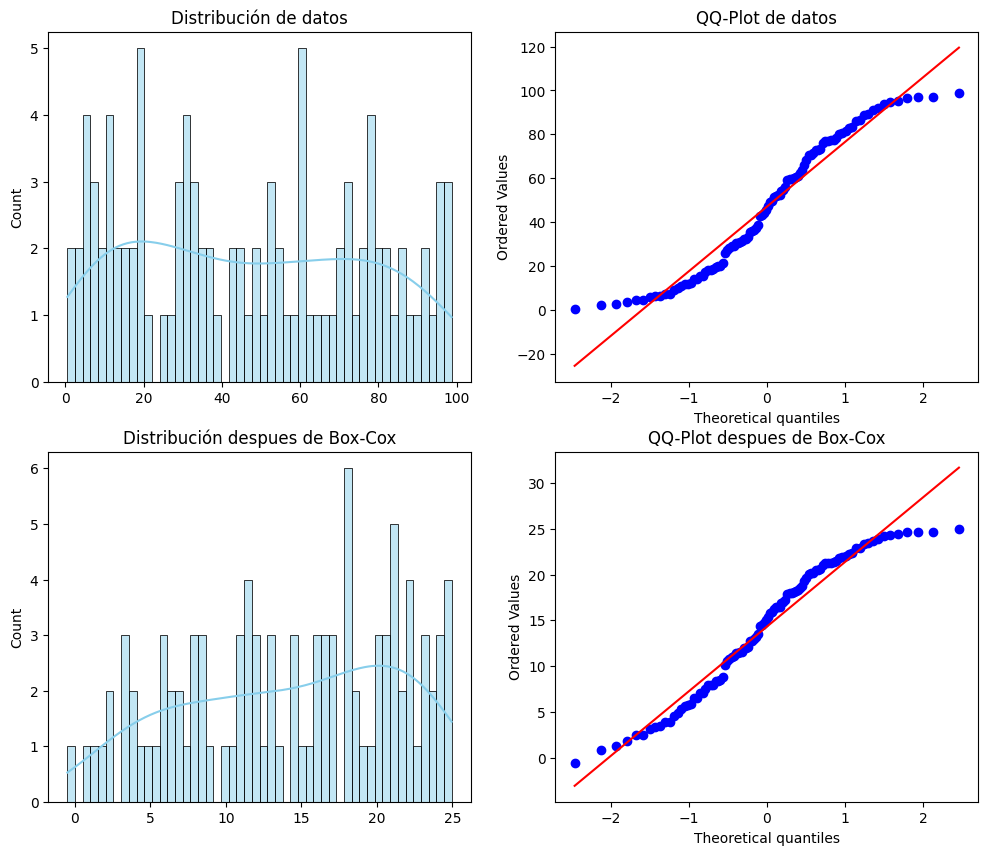

In [55]:
plt.figure(figsize=(12, 10))
# Histograma
plt.subplot(2, 2, 1)
sns.histplot(random_data_3, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución de datos")

# QQ-Plot
plt.subplot(2, 2, 2)
stats.probplot(random_data_3, dist="norm", plot=plt)
plt.title(f"QQ-Plot de datos")

# Histograma
plt.subplot(2, 2, 3)
sns.histplot(datos_transformados, bins=50, kde=True, color="skyblue")
plt.title(f"Distribución despues de Box-Cox")

# QQ-Plot
plt.subplot(2, 2, 4)
stats.probplot(datos_transformados, dist="norm", plot=plt)
plt.title(f"QQ-Plot despues de Box-Cox")

plt.show()